<a href="https://colab.research.google.com/github/ZechenZed/ZechenZed/blob/main/CMU_24784_S2022_P1_Students_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scratchai-nightly  
# for adversarial attack
!pip install torchvision==0.9.1 
# deep learning models
!pip install flashtorch         
# visualization based on activation maximization 
!pip install mapextrackt        
# visualization of neural network saliency map
! pip install imutils

     |████████████████████████████████| 87 kB 1.9 MB/s 
     |████████████████████████████████| 17.4 MB 12.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.7 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
  Created wheel for flashtorch: filename=flashtorch-0.1.3-py3-none-any.whl size=26245 sha256=0e752e2caf2

In [2]:
# download and store locally a stop sign image
stop_sign_url = 'https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg'
!mkdir input_images
!wget https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg -O input_images/stop.jpg

--2022-02-22 19:38:54--  https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92066 (90K) [image/jpeg]
Saving to: ‘input_images/stop.jpg’

input_images/stop.j 100%[===================>]  89.91K  --.-KB/s    in 0.01s   

2022-02-22 19:38:54 (6.54 MB/s) - ‘input_images/stop.jpg’ saved [92066/92066]



In [3]:
# suppress error
import logging as logging
import sys as sys
logging.disable(sys.maxsize) 

# import the library
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from scratchai import *
import imutils

from flashtorch.activmax import GradientAscent
from MapExtrackt import FeatureExtractor
from torch.distributions import Normal


# set parameters
stop_sign_path = 'input_images/stop.jpg' #stop sign image path
true_class = 919 # imagenet id for street sign


# function handle to get prediction more easily
def get_prediction(image, model):
    #assumes img and net are datasets and models trained using imagenet dataset  
    confidences = model(image.unsqueeze(0))
    class_idx = torch.argmax(confidences, dim=1).item()
    class_label = datasets.labels.imagenet_labels[class_idx]
    return class_label, confidences[0, class_idx].item(), class_idx

**1a: Making prediction**

In [4]:
# load and preprocess the stop sign image
img = imgutils.load_img(stop_sign_path)
img = imgutils.get_trf('rz256_cc224_tt_normimgnet')(img) #normalize and reshape the input image

# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# net = ...  # load resnet
resnet = models.resnet18(pretrained=True).eval()

# use the provided get_prediction function to predict the class of the stop sign image
[label,confidence,idx] = get_prediction(img,resnet)
print('Recongnize:',label,' Confidence:',confidence)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Recongnize: street sign  Confidence: 13.558080673217773


In [5]:
print(type(img))

<class 'torch.Tensor'>


**1b: Random perturbation**

In [6]:
epsilon = np.array([0.1,0.5,1])
print(epsilon[0])

0.1


In [7]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

epsilon = np.array([0.1,0.5,1.]) # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling
np.random.seed(0) # also set random seed for np

Prediction = street sign,  Confidence Score = 14.606322288513184,  label_id = 919 


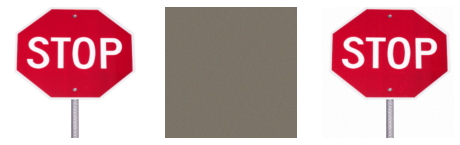

Prediction = doormat, welcome mat,  Confidence Score = 15.085670471191406,  label_id = 539 


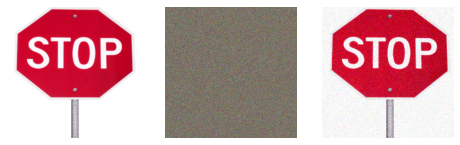

Prediction = doormat, welcome mat,  Confidence Score = 15.21985149383545,  label_id = 539 


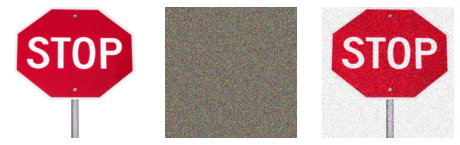

In [14]:
#noisy_img
for i in epsilon: 
  noisy_img =  attacks.noise(img,eps=i) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]
  prediction, conf, label_id = get_prediction(noisy_img, resnet) # output prediction, conf, and label_id using get_prediction function
  print("Prediction = {}, ".format(prediction), "Confidence Score = {}, ".format(conf), "label_id = {} ".format(label_id))
  imgutils.imshow([img,img-noisy_img,noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

**1c: FGM Attack**

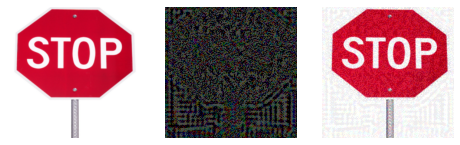

(('street sign', 13.558080673217773),
 ('doormat, welcome mat', 14.294464111328125))

In [15]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.FGM, nstr='resnet18', ret=True) # perform FGM attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

true_labels, predicted_labels # show true and predicted labels

**1d: PGD Attack**

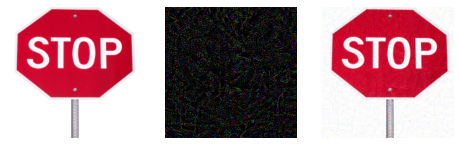

(('street sign', 13.558080673217773),
 ('streetcar, tram, tramcar, trolley, trolley car', 30.324739456176758))

In [16]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

target_class = 829 # imagenet id for street car

images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.PGD, nstr='resnet18', ret=True, y=target_class) # perform PGD attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

true_labels, predicted_labels #show true and predicted labels

**2a: AlexNet layer 0 visualization**

In [18]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

model = models.alexnet(pretrained=True).eval()  #load pretrained alexnet

print(model) #show the alexnet structure

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


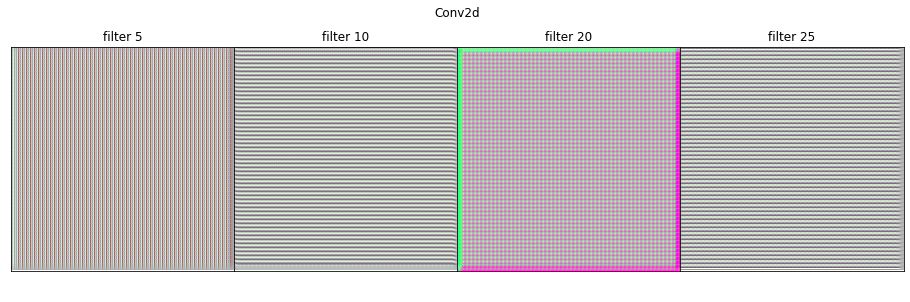

In [19]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

#load GradientAscent on GPU
g_ascent = GradientAscent(model.features)
g_ascent.use_gpu = True

layer_idx = 0 # set the layer index

filters = [5, 10, 20, 25] # set the filter numbers

layer = model.features[layer_idx] # select the 1st conv layer

g_ascent.visualize(layer, filters) # call g_ascent.visualize() with the correct arguments to output the visualization



**2b: AlexNet layer 10 visualization**

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


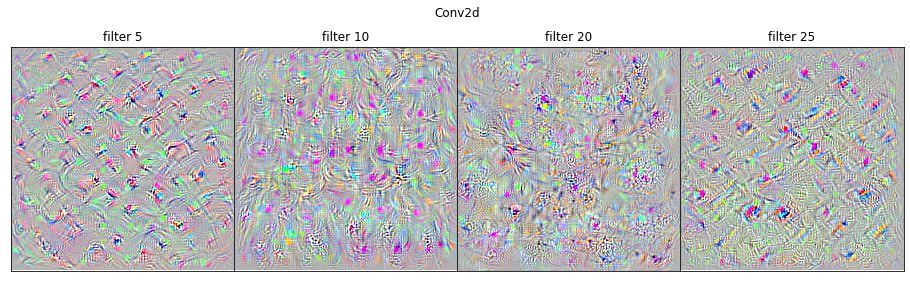

In [20]:
# MODIFY THE CODE FOR 2a TO VISUALIZE LAYER 10, FILTERS [5, 10, 15, 20] OF ALEXNET
# Same from above
g_ascent = GradientAscent(model.features)
g_ascent.use_gpu = True

layer_idx = 10 # set the layer index

filters = [5, 10, 20, 25] # set the filter numbers

layer = model.features[layer_idx] # select the 1st conv layer

g_ascent.visualize(layer, filters) # call g_ascent.visualize() with the correct arguments to output the visualization

**2c: AlexNet saliency map with the stop sign image**

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


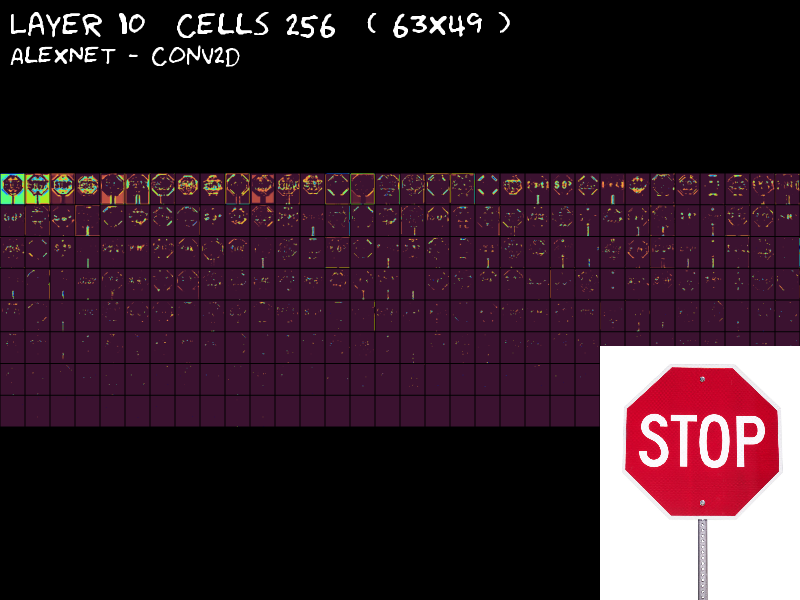

In [21]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# load FeatureExtractor
from MapExtrackt import FeatureExtractor

layer_idx = 10 #define the layer index

fe = FeatureExtractor(model)

fe.set_image(stop_sign_path) # stop_sign_path is the path to the stop sign image

fe.display_from_map(layer_no=layer_idx)

**3: Example of plot with a confidence interval**



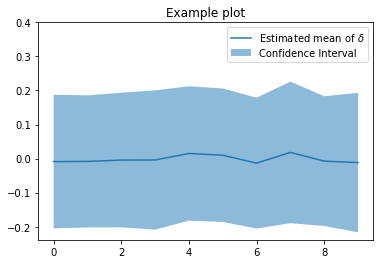

In [22]:
#THIS IS JUST AN EXAMPLE TO PLOT CONFIDENCE INTERVAL AS SHADED AREA

n = 500 # number of samples
k = 10  # number of replications
sigma = 0.2

torch.manual_seed(0) # set the random seed
deltas = torch.FloatTensor(sigma*torch.randn(n, k)) # gaussian samples ~ N(0, sigma*I)

# compute mean and standard deviation
mean_ = deltas.mean(dim=0)
std_ = deltas.std(dim=0)

# generate the plot
x = np.arange(k) # populate x axis
plt.plot(x, mean_, label="Estimated mean of $\delta$")
plt.fill_between(x, mean_ - std_, mean_ + std_, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.legend()
plt.ylim([None, 0.4]) 
plt.title('Example plot')
plt.show()

**Density computation example with log_prob**

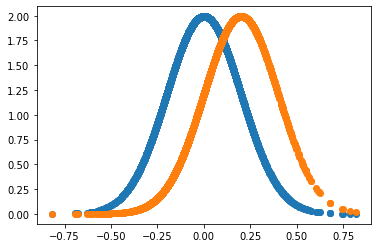

In [25]:
# THIS IS AN EXAMPLE TO USE log_prob METHOD FOR EASIER DENSITY COMPUTATION

# Suppose you want to compute the density of Normal distribution

# create Normal distribution object
p = Normal(torch.tensor([0.0]), torch.tensor([sigma]))       # N(0, sigma**2)
p_tilde = Normal(torch.tensor([0.2]), torch.tensor([sigma])) # N(1, sigma**2)

# use log_prob method
log_density_orig = p.log_prob(deltas) # log_prob method gives you log densities
log_density_tilde = p_tilde.log_prob(deltas) 

# verify this by plotting the density, i.e. the exp of the log_density
plt.scatter(deltas, torch.exp(log_density_orig), label="p")
plt.scatter(deltas, torch.exp(log_density_tilde), label="p_tilde")
plt.show()

**3a: MC estimator for prob. robustness of ResNet-18**

In [26]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

net = models.resnet18(pretrained=True).eval() # load resnet

sigma = 0.2 # parameter sigma

# evaluate the model k times, each time use n samples
k = 10 # number of replications
n = 50 # number of samples in each replication

# collect the samples
torch.manual_seed(0) # set the random seed
deltas = torch.FloatTensor(sigma*torch.randn(*img.shape, n, k)) # gaussian samples ~ N(0, sigma*I)

resnet_test=np.zeros([n, k])

for i in range(k):
    for j in range(n):
        noisy_img = img + deltas[:, :, :, j, i]
        _, _, y_i = get_prediction(noisy_img, net)
        resnet_test[j, i] = y_i != true_class

In [27]:
# compute the mean and standard deviation of your estimator
mu_hat_n_samples = resnet_test.mean(axis=0)

mean_ = mu_hat_n_samples.mean()
std_ = mu_hat_n_samples.std()

mean_, std_

(0.04, 0.029664793948382652)

In [42]:
# REPEAT THE ABOVE EXAMPLE FOR n = [100, ..., 500]
n_range = np.arange(50, 501, 50, dtype=int)
mu_hats = np.array([])
stds = np.array([])
for n in n_range:
    torch.manual_seed(0) # set the random seed
    deltas = torch.FloatTensor(sigma*torch.randn(*img.shape, n, k)) # gaussian samples ~ N(0, sigma*I)
    resnet_test=np.zeros([n, k])
    for i in range(k):
        for j in range(n):
            noisy_img = img + deltas[:, :, :, j, i]
            _, _, y_i = get_prediction(noisy_img, net)
            resnet_test[j, i] = y_i != true_class
    mu_hat_n_samples = resnet_test.mean(axis=0)
    mean_ = mu_hat_n_samples.mean()
    std_ = mu_hat_n_samples.std()
    mu_hats = np.append(mu_hats,mean_)
    stds = np.append(stds,std_)
    print("n = ",n)
print(mu_hats, stds)

n =  50
n =  100
n =  150
n =  200
n =  250
n =  300
n =  350
n =  400
n =  450
n =  500


Ellipsis

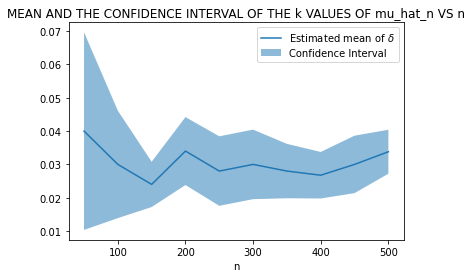

In [45]:
# PLOT THE MEAN AND THE CONFIDENCE INTERVAL OF THE k VALUES OF mu_hat_n VS n
x = np.arange(k) # populate x axis
plt.plot(n_range, mu_hats, label="Estimated mean of $\delta$")
plt.fill_between(n_range, mu_hats - stds, mu_hats + stds, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.xlabel('n')
plt.legend()
plt.title('Mean & Confidence level')
plt.show()

**3b: MC relative error**

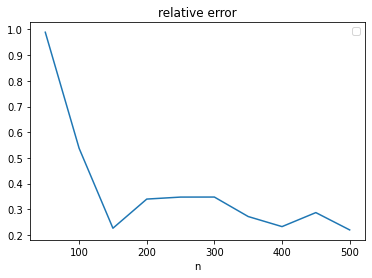

In [46]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

mu = 0.03 #true mu value

relative_error =  stds/ mu  # compute the relative error

# PLOT THE RELATIVE ERROR VS n
plt.plot(n_range, relative_error)
plt.xlabel('n')
plt.title('relative error')
plt.legend()

**3c: Misclassification rate w.r.t. samples close to an adversarial example**

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# repeat the FGM attack from problem 1c
images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.FGM, nstr='resnet18', ret=True) # perform FGM attacks and return all the outputs

true_labels, predicted_labels # show true and predicted labels
xtilde = images[2]
imgutils.imshow(xtilde)

# perform mean shift, closer to the adversarial example
scale = 1/3
mean_shift = scale*xtilde
print(mean_shift.shape)

# generate Gaussian samples centered at the mean_shift
resnet = models.resnet18(pretrained=True).eval()
torch.manual_seed(0) # set the random seed
sigma = 0.2
p_tilde = Normal(mean_shift, torch.tensor([sigma])) # N(1, sigma**2)
k = 10

**3d: IS estimator**

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# use the sample generated in 3c and the log_prob method to compute the likelihood ratio
p = Normal(torch.tensor([0.0]), torch.tensor([sigma])) # N(0, sigma**2)

log_density_p = p.log_prob(deltas) # log_density per dimension for each sample under dist p = N(0, sigma**2)

log_density_ptilde = p.log_prob(deltas - mean_shift) # log_density per dimension for each sample under dist ptilde = N(mean_shift, sigma**2)

# compute log_likelihood per sample (assuming i.i.d. noise )
log_lkl_p = log_density_p.view(-1, log_density_p.size(3), log_density_p.size(4)).sum(axis=0)
log_lkl_ptilde = log_density_ptilde.view(-1, log_density_ptilde.size(3), log_density_ptilde.size(4)).sum(axis=0)

# compute likelihood ratio
lkl_ratio = torch.exp(log_lkl_p - log_lkl_ptilde)

# proceed to compute the IS estimator
...


In [ ]:
# similar to 3a, repeat for n = [100, ..., 1000]
...

# plot the mean and the confidence interval of mu_hat_n vs n
...

**3e: IS relative error**

In [ ]:
# similar to 3b, but use the IS result
...
